In [189]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [190]:
PATH = "./data/"
os.listdir(PATH)

['.DS_Store', 'AMZN.csv', 'WFM.csv']

In [191]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        df = df.join(df_temp)

    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    return ax;
    
def normalize_data(df):
  """Normalize stock prices using the first row of the dataframe."""
  return df / df.ix[0, :]

In [192]:

dates = pd.date_range('2016-06-17', '2017-06-16')
symbols = ['AMZN', 'WFM']    
df = get_data(symbols, dates)
df.dropna(inplace=True, how='any')

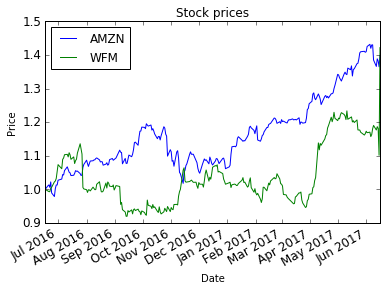

In [193]:
df_normalized = normalize_data(df)
plot_data(df_normalized)
plt.show()

In [194]:
print("Statistics data analysis for the stock")
print("Mean : ")
print(df.mean())
print("\n")
print("Median")
print(df.median())
print("\n")
print("Std Deviation")
print(df.std())

Statistics data analysis for the stock
Mean : 
AMZN    822.813731
WFM      31.147285
dtype: float64


Median
AMZN    809.959992
WFM      30.460210
dtype: float64


Std Deviation
AMZN    76.930038
WFM      2.630341
dtype: float64


In [195]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(center=False,window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(center=False,window=window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + (rstd*2)
    lower_band = rm - (rstd*2)
    return upper_band, lower_band

In [196]:
print("Rolling Statistics data analysis for the stock")
print("Mean : ")
print(df.rolling(center=False,window=20).mean())
print("\n")
print("Median")
print(df.rolling(center=False,window=20).median())
print("\n")
print("Std Deviation")
print(df.rolling(center=False,window=20).std())

Rolling Statistics data analysis for the stock
Mean : 
                  AMZN        WFM
2016-06-17         NaN        NaN
2016-06-20         NaN        NaN
2016-06-21         NaN        NaN
2016-06-22         NaN        NaN
2016-06-23         NaN        NaN
2016-06-24         NaN        NaN
2016-06-27         NaN        NaN
2016-06-28         NaN        NaN
2016-06-29         NaN        NaN
2016-06-30         NaN        NaN
2016-07-01         NaN        NaN
2016-07-05         NaN        NaN
2016-07-06         NaN        NaN
2016-07-07         NaN        NaN
2016-07-08         NaN        NaN
2016-07-11         NaN        NaN
2016-07-12         NaN        NaN
2016-07-13         NaN        NaN
2016-07-14         NaN        NaN
2016-07-15  724.671002  31.587094
2016-07-18  726.155002  31.732142
2016-07-19  727.452002  31.854969
2016-07-20  728.947000  31.993071
2016-07-21  730.638501  32.138074
2016-07-22  731.777499  32.294977
2016-07-25  733.809997  32.489372
2016-07-26  736.021500  32.

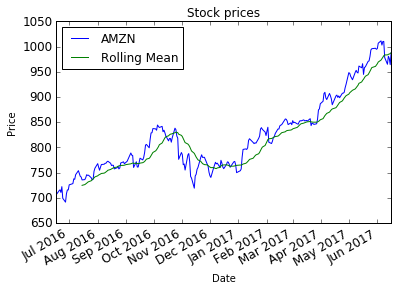

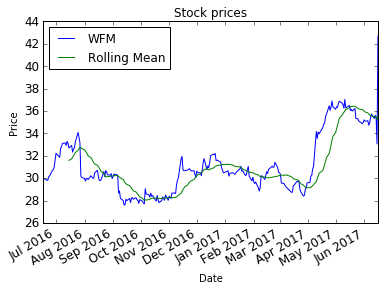

In [197]:
ax = plot_data(df['AMZN'])
rm_data = df['AMZN'].rolling(center=False,window=20).mean() 
rm_data.plot(label="Rolling Mean", ax = ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price");
ax.legend(loc="upper left")
plt.show()

ax = plot_data(df['WFM'])
rm_data = df['WFM'].rolling(center=False,window=20).mean()
rm_data.plot(label="Rolling Mean", ax = ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price");
ax.legend(loc="upper left")
plt.show()

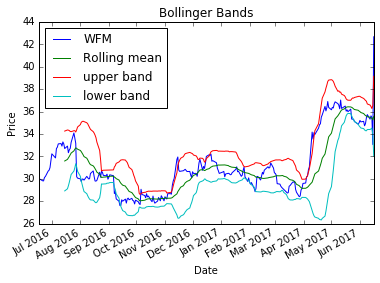

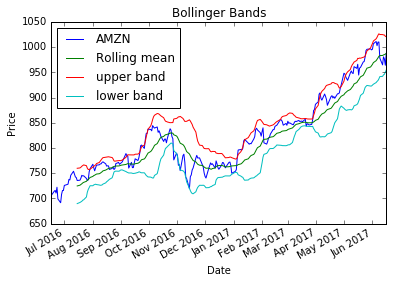

In [198]:
rm_WFM = get_rolling_mean(df['WFM'], window=20)
rstd_WFM = get_rolling_std(df['WFM'], window=20)
upper_band, lower_band = get_bollinger_bands(rm_WFM, rstd_WFM)    
    # Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['WFM'].plot(title="Bollinger Bands", label='WFM')
rm_WFM.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

rm_AMZN = get_rolling_mean(df['AMZN'], window=20)
rstd_AMZN = get_rolling_std(df['AMZN'], window=20)
upper_band, lower_band = get_bollinger_bands(rm_AMZN, rstd_AMZN)    
    # Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['AMZN'].plot(title="Bollinger Bands", label='AMZN')
rm_AMZN.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

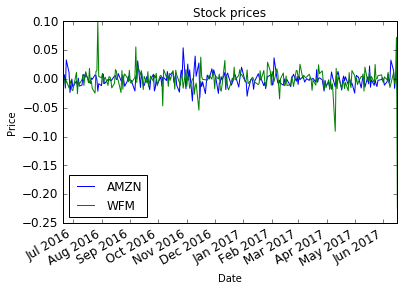

In [199]:
#Daily returns for stock
daily_retuns = df.copy()
daily_returns[1:] = df[:-1].values / df[1:] - 1
daily_returns.ix[0,:] = 0
plot_data(daily_returns)
plt.show()

In [200]:
print(daily_returns.head())

print(daily_returns.tail())

                AMZN       WFM
2016-06-20  0.000000  0.000000
2016-06-21 -0.002529  0.001646
2016-06-22  0.007346  0.000329
2016-06-23 -0.015899 -0.010108
2016-06-24  0.033078 -0.002926
                AMZN       WFM
2017-06-12  0.013887  0.011608
2017-06-13 -0.016191 -0.008422
2017-06-14  0.004424  0.004795
2017-06-15  0.012757  0.072293
2017-06-16 -0.023833 -0.225398


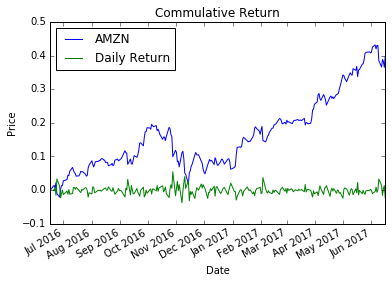

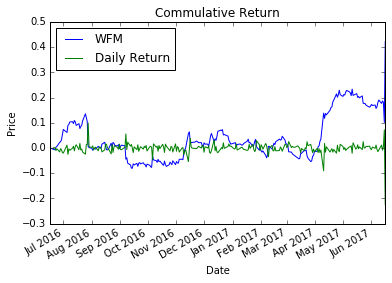

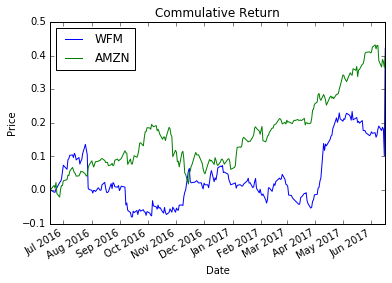

In [201]:
# commulative return calculation
comm_returns = df.copy()
comm_returns = df / df.ix[0,:] - 1

ax = comm_returns['AMZN'].plot(title="Commulative Return", label='AMZN')
daily_returns['AMZN'].plot(label='Daily Return', ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

ax = comm_returns['WFM'].plot(title="Commulative Return", label='WFM')
daily_returns['WFM'].plot(label='Daily Return', ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

ax = comm_returns['WFM'].plot(title="Commulative Return", label='WFM')
comm_returns['AMZN'].plot(label='AMZN', ax=ax,)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

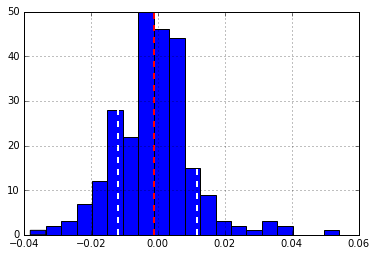

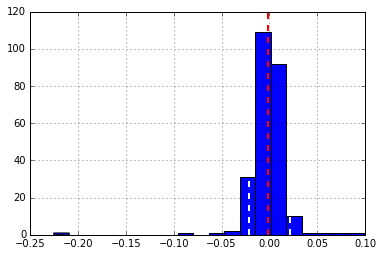

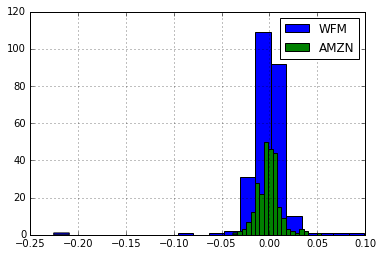

In [202]:
# histograms

daily_returns['AMZN'].hist(bins=20)
mean = daily_returns['AMZN'].mean()
std = daily_returns['AMZN'].std()
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='w', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='w', linestyle='dashed', linewidth=2)
plt.show()

daily_returns['WFM'].hist(bins=20)
mean = daily_returns['WFM'].mean()
std = daily_returns['WFM'].std()
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='w', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='w', linestyle='dashed', linewidth=2)
plt.show()

daily_returns['WFM'].hist(bins=20, label='WFM')
daily_returns['AMZN'].hist(bins=20, label='AMZN')
#mean = daily_returns['WFM'].mean()
#std = daily_returns['WFM'].std()
#plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
#plt.axvline(std, color='w', linestyle='dashed', linewidth=2)
#plt.axvline(-std, color='w', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [203]:
# kurtosis of daily_returns
print(daily_returns.kurtosis())

AMZN     2.868474
WFM     51.195543
dtype: float64


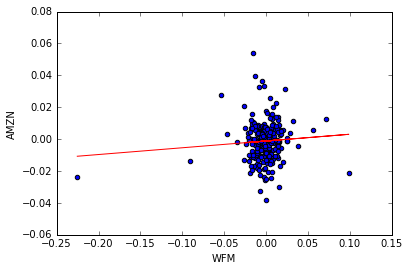

In [204]:
# scatter plots
daily_returns.plot(kind='scatter',x='WFM',y='AMZN')
beta_WFM, elpha_WFM = np.polyfit(daily_returns['WFM'], daily_returns['AMZN'],1)
plt.plot(daily_returns['WFM'], beta_WFM*daily_returns['WFM']+elpha_WFM,'-', color='r')
plt.show()

In [205]:
# co-relation coefficient
print(daily_returns.corr(method='pearson'))

          AMZN       WFM
AMZN  1.000000  0.076516
WFM   0.076516  1.000000
